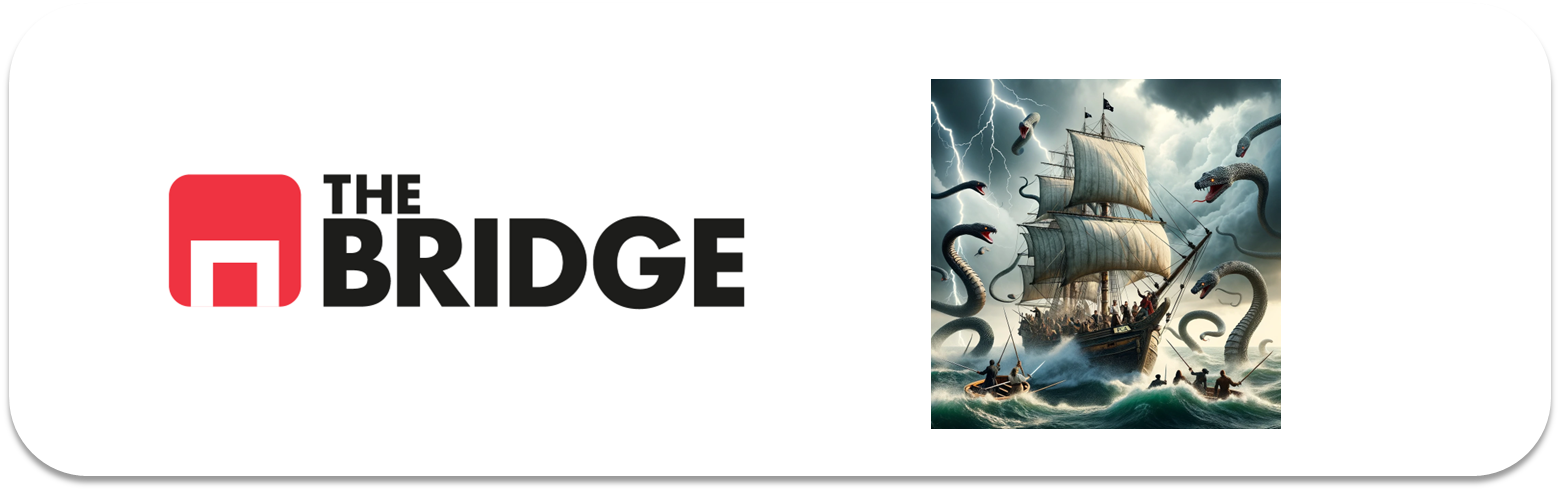

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import bootcampviztools as bt
import matplotlib.pyplot as plt
import seaborn as sns

import ML_tool_box_basic_plot as tbb

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


>## 1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

In [2]:
df_credit = pd.read_csv("./data/credit_npo.csv")

In [3]:
df_credit.SeriousDlqin2yrs.unique()

array([0, 1], dtype=int64)

In [4]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [5]:
# Nos deshacemos de MonthtlyIncome y NumberOfDependents por tener nulos

df_credit.drop(columns=["MonthlyIncome","NumberOfDependents"], inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 6   NumberOfTimes90DaysLate               12537 non-null  int64  
 7   NumberRealEstateLoansOrLines          12537 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 881.6 KB


In [6]:
target = "SeriousDlqin2yrs"

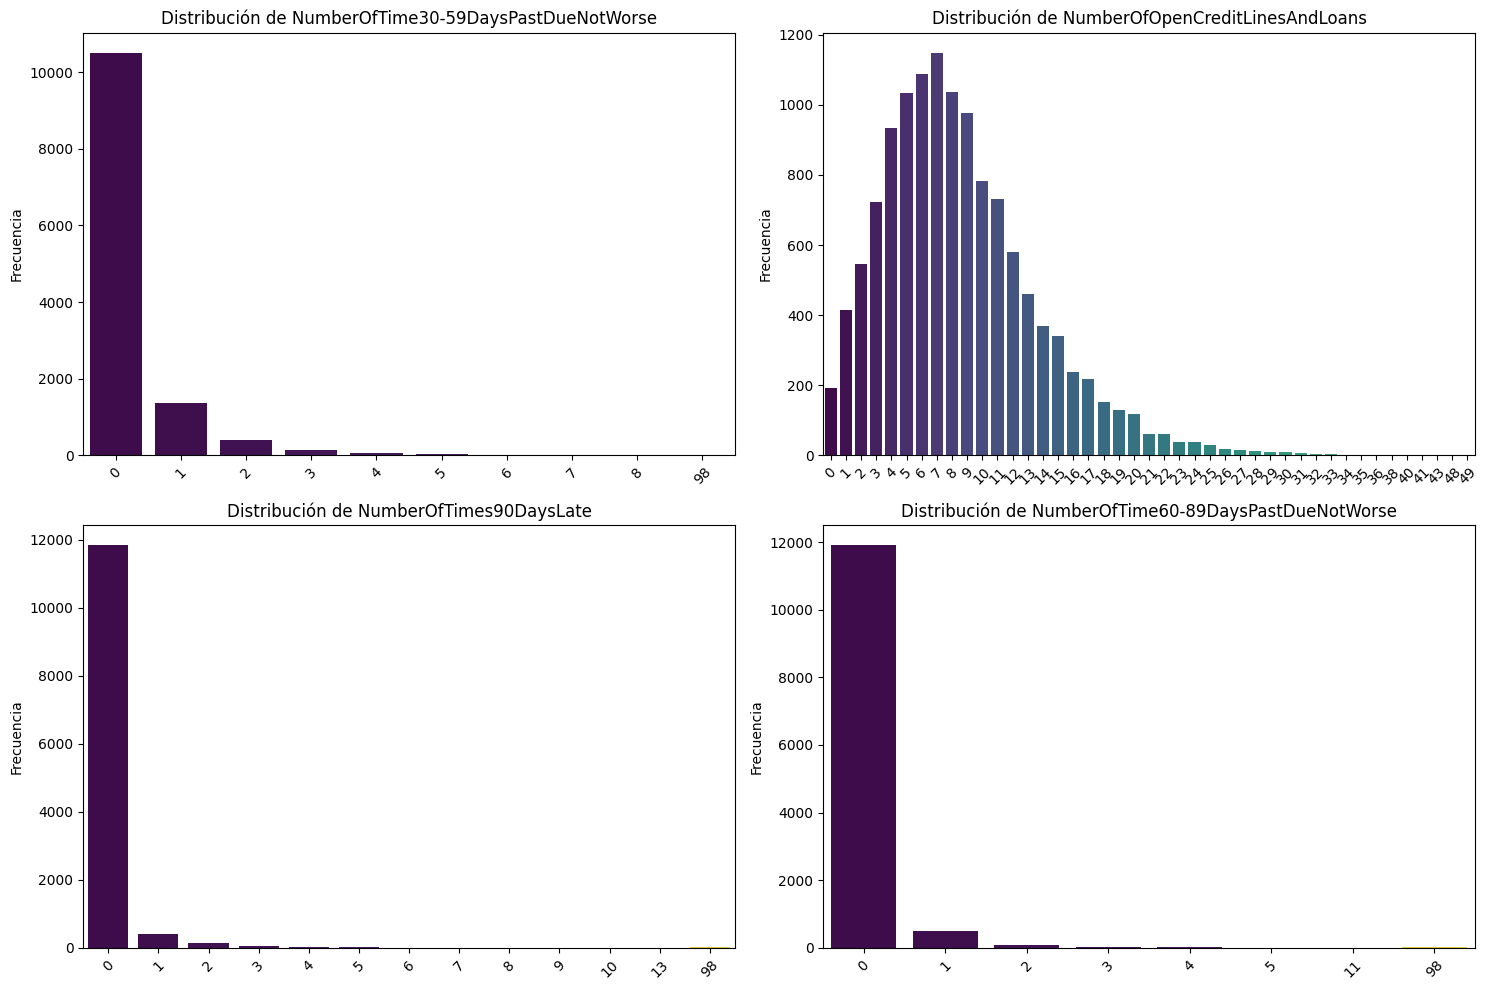

In [7]:
# Tratamiento features NumberOf...

features_NumberOf = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse"]

bt.pinta_distribucion_categoricas(df_credit, features_NumberOf)

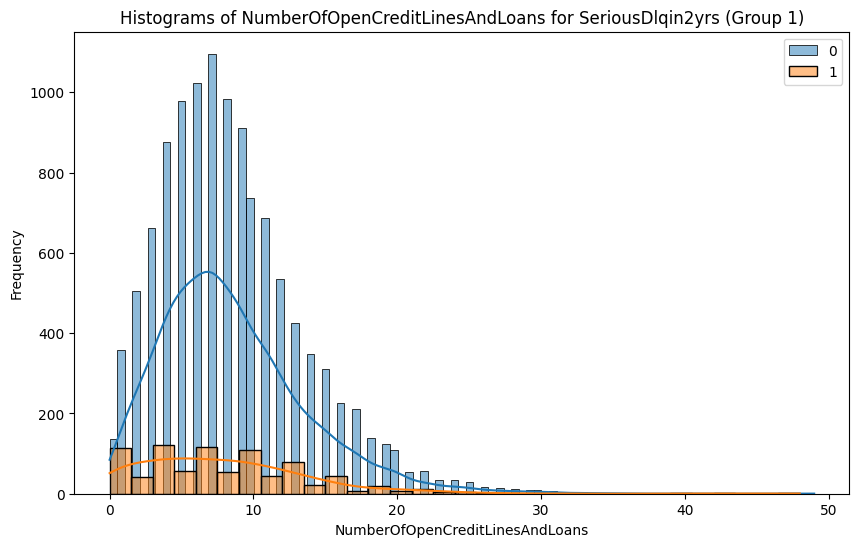

In [8]:
bt.plot_grouped_histograms(df_credit, cat_col=target, num_col="NumberOfOpenCreditLinesAndLoans", group_size=2)

In [9]:
# NumberOfTime30-59DaysPastDueNotWorse

df_credit.loc[df_credit[features_NumberOf[0]] == 0, "NumberOfTime30-59DaysPastDueNotWorse"] = 0
df_credit.loc[df_credit[features_NumberOf[0]] != 0, "NumberOfTime30-59DaysPastDueNotWorse"] = 1

# NumberOfTimes90DaysLate

df_credit.loc[df_credit[features_NumberOf[2]] == 0, "NumberOfTimes90DaysLate"] = 0
df_credit.loc[df_credit[features_NumberOf[2]] != 0, "NumberOfTimes90DaysLate"] = 1
        
# NumberOfTime60-89DaysPastDueNotWorse

df_credit.loc[df_credit[features_NumberOf[3]] == 0, "NumberOfTime60-89DaysPastDueNotWorse"] = 0
df_credit.loc[df_credit[features_NumberOf[3]] != 0, "NumberOfTime60-89DaysPastDueNotWorse"] = 1


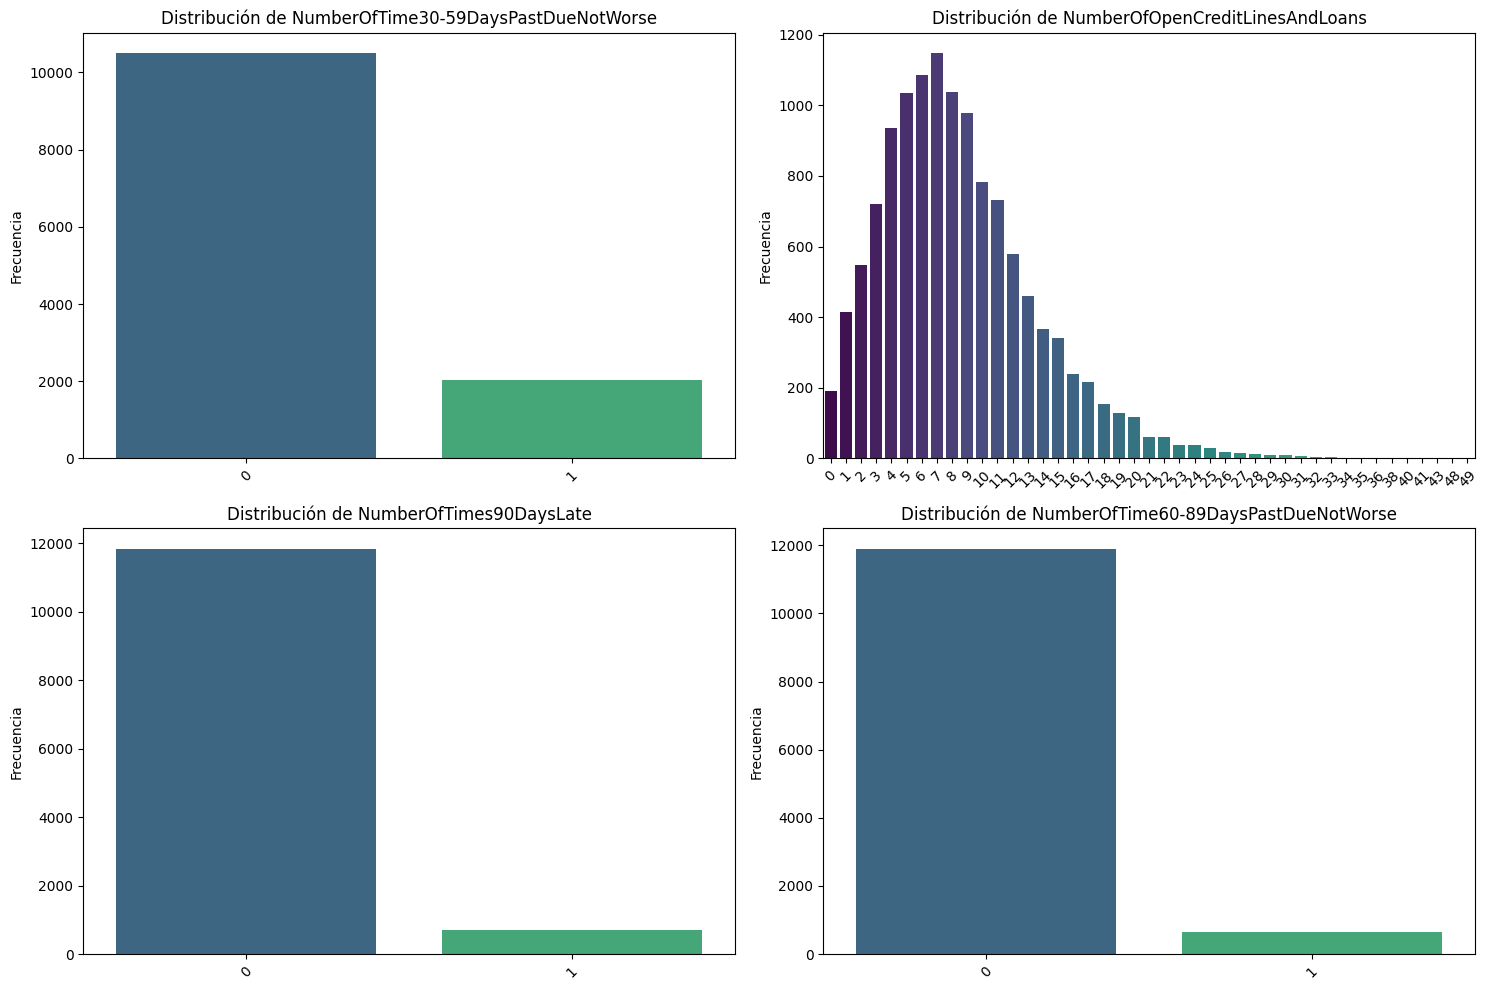

In [10]:
bt.pinta_distribucion_categoricas(df_credit, features_NumberOf)

In [11]:
tbb.ALL_describe_features(df_credit)

,COL_N,DATA_TYPE,NO MISSING,MISSING,MISSING (%),UNIQUE_VALUES,CARDIN (%),DATA_CLASS
0,SeriousDlqin2yrs,int64,12537,0,0.0,2,0.02,Binaria
1,RevolvingUtilizationOfUnsecuredLines,float64,12537,0,0.0,10764,85.86,Numérica Continua
2,age,int64,12537,0,0.0,78,0.62,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,int64,12537,0,0.0,2,0.02,Binaria
4,DebtRatio,float64,12537,0,0.0,11547,92.10,Numérica Continua
5,NumberOfOpenCreditLinesAndLoans,int64,12537,0,0.0,43,0.34,Numérica Discreta
6,NumberOfTimes90DaysLate,int64,12537,0,0.0,2,0.02,Binaria
7,NumberRealEstateLoansOrLines,int64,12537,0,0.0,16,0.13,Numérica Discreta
8,NumberOfTime60-89DaysPastDueNotWorse,int64,12537,0,0.0,2,0.02,Binaria


>## 2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 

In [12]:
features_cat = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse"]

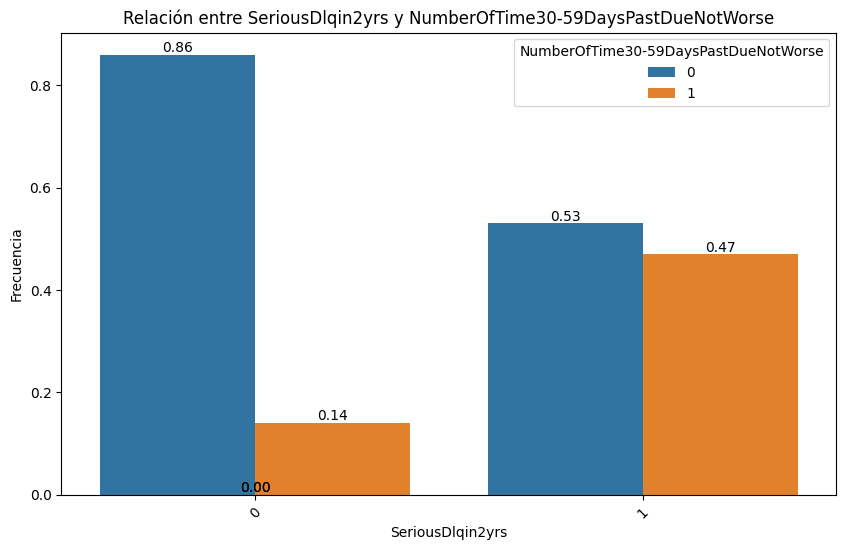

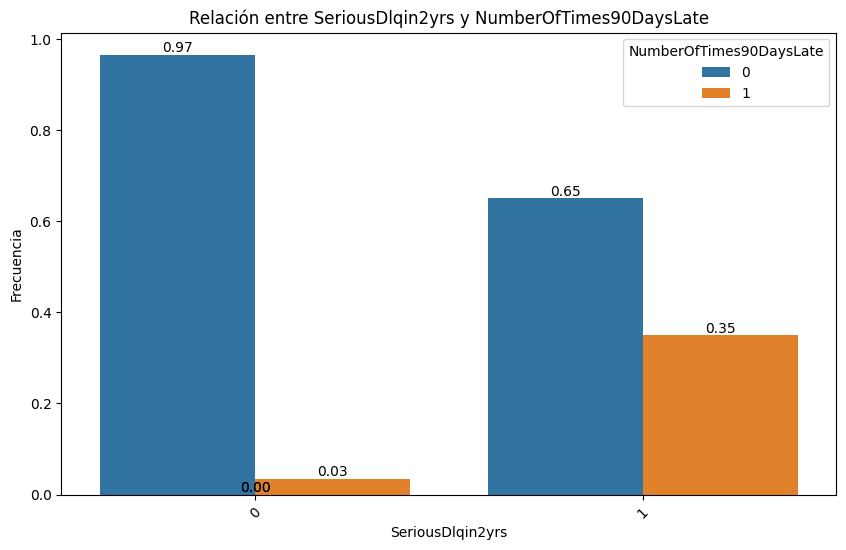

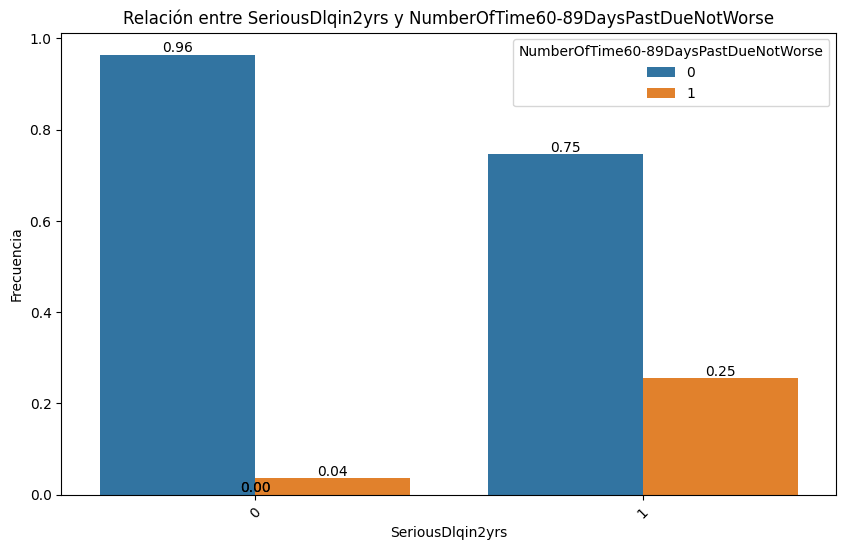

In [13]:
for cat in features_cat:

    bt.plot_categorical_relationship_fin(df_credit, target, cat, show_values=True,relative_freq=True)

In [14]:
features_num = list(df_credit.columns)
for fea_cat in features_cat:
    features_num.remove(fea_cat)

features_num

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

### 2.1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

- Como el target es binario, no se pude hacer una correlacion sobre el. No es una categoria ordinal sobre la que si que se podria.    
- Asi que vamos a ver las relaciones entre las features numericas para ver si hay colinealidades entre ellas.

In [15]:
features_num_copy = features_num.copy()

In [16]:
features_num_copy.remove(target)
features_num_sin_target = features_num_copy

<Axes: >

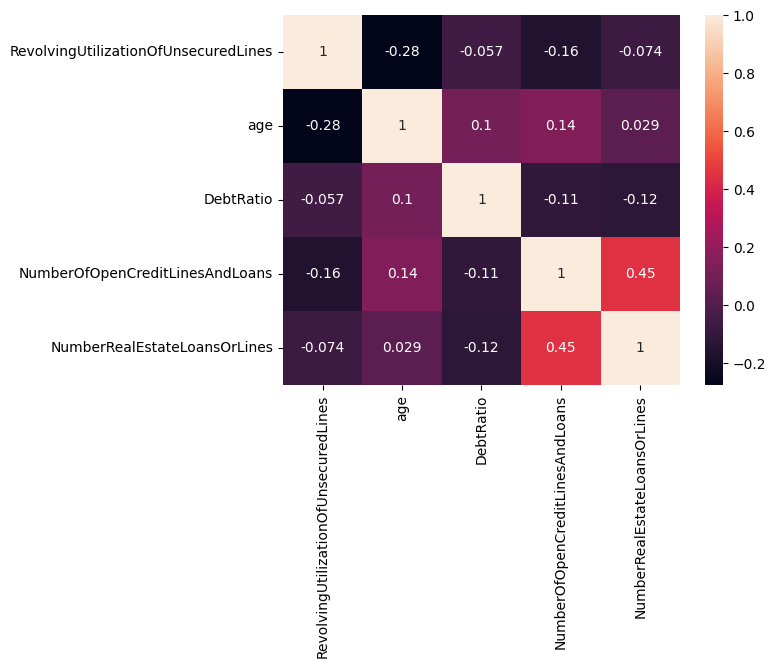

In [17]:
corr = df_credit[features_num_sin_target].corr()
sns.heatmap(corr, annot=True)

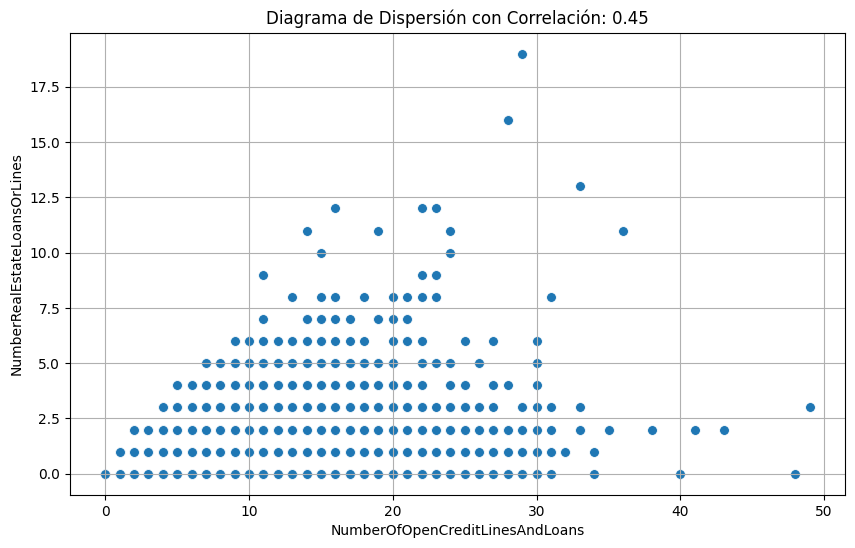

In [18]:
bt.grafico_dispersion_con_correlacion(df_credit, 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', mostrar_correlacion=True)

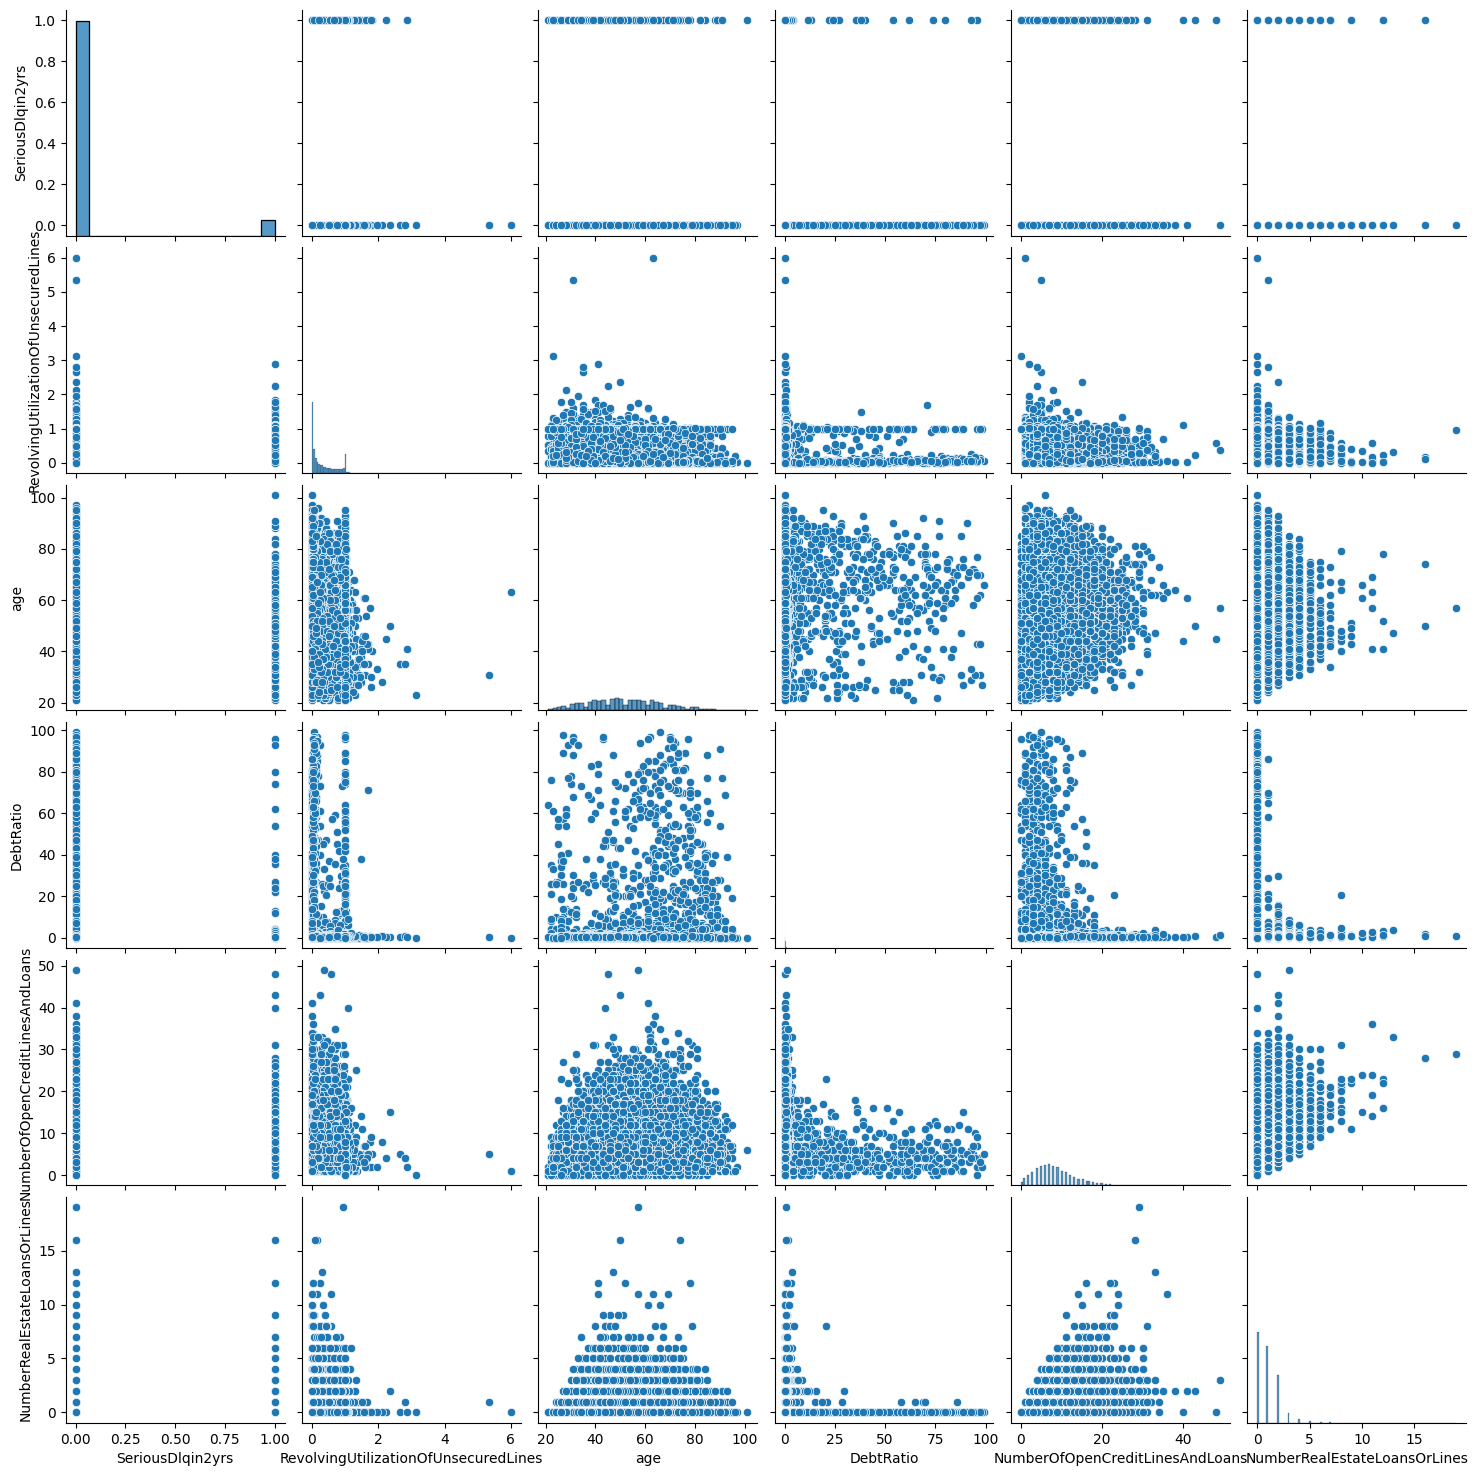

In [19]:
sns.pairplot(df_credit[features_num])

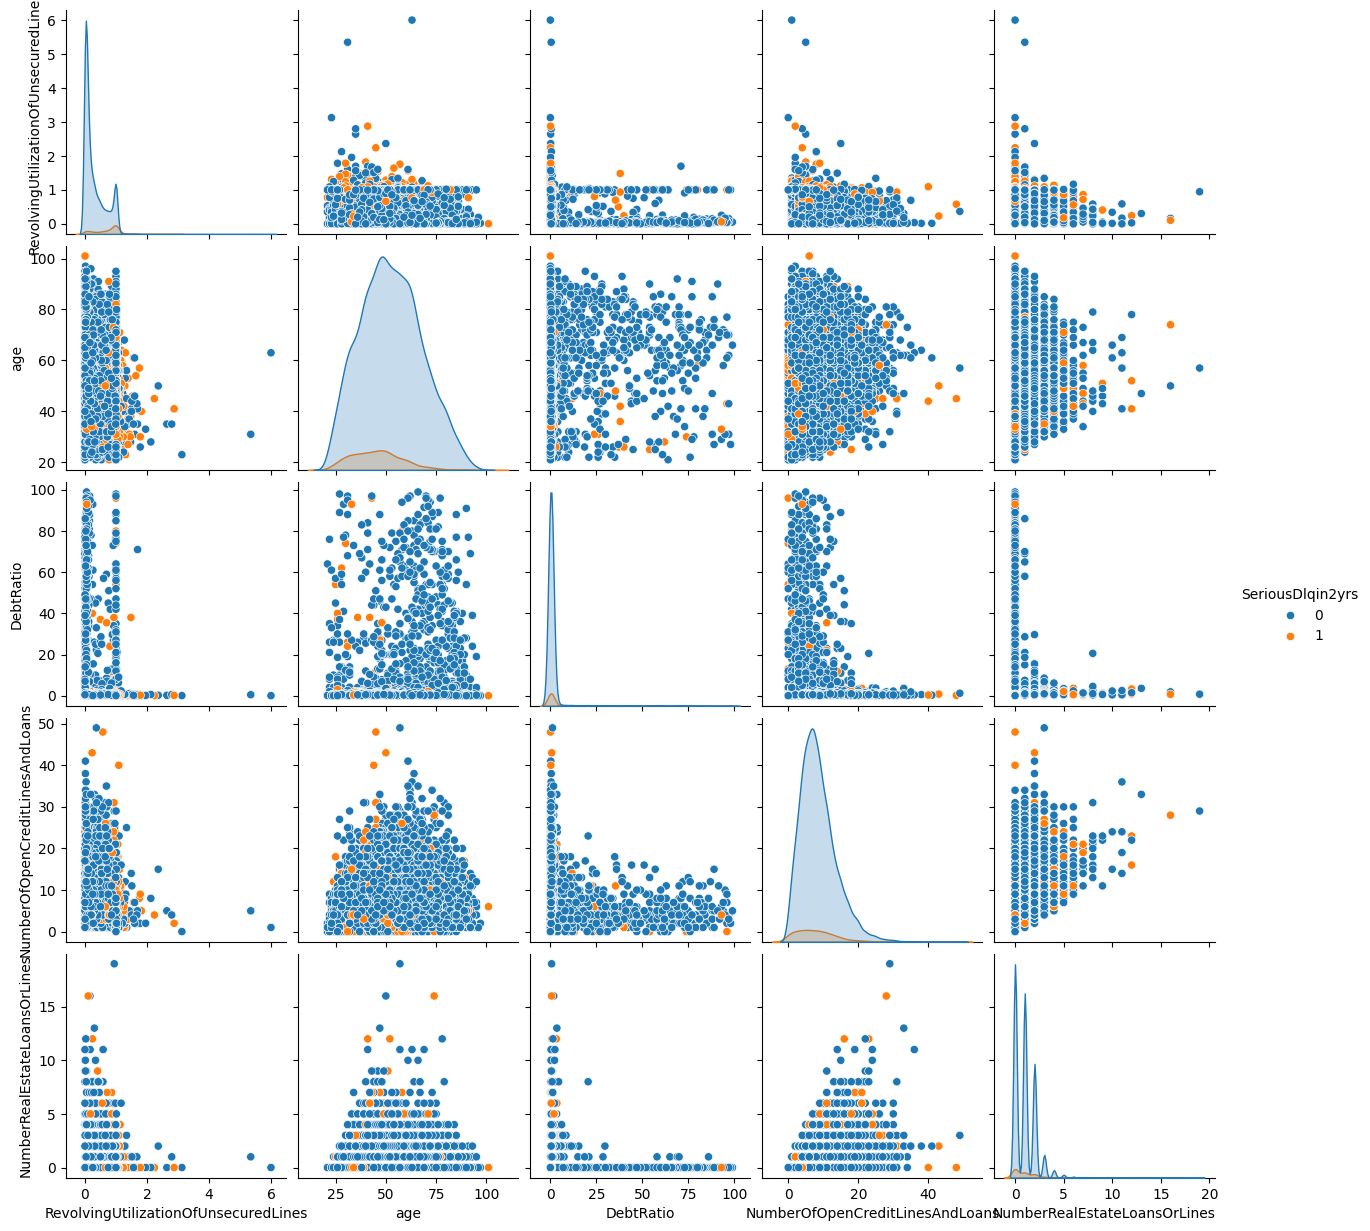

In [20]:
sns.pairplot(df_credit[features_num], hue=target)

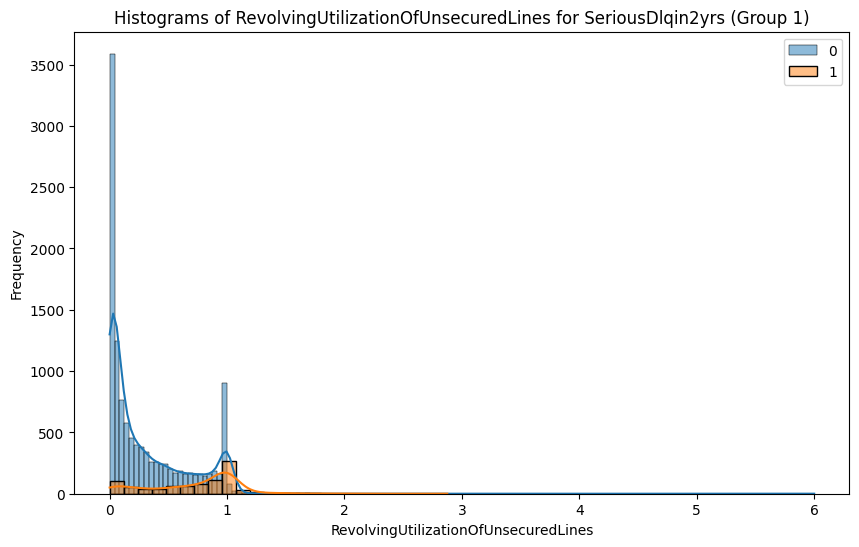

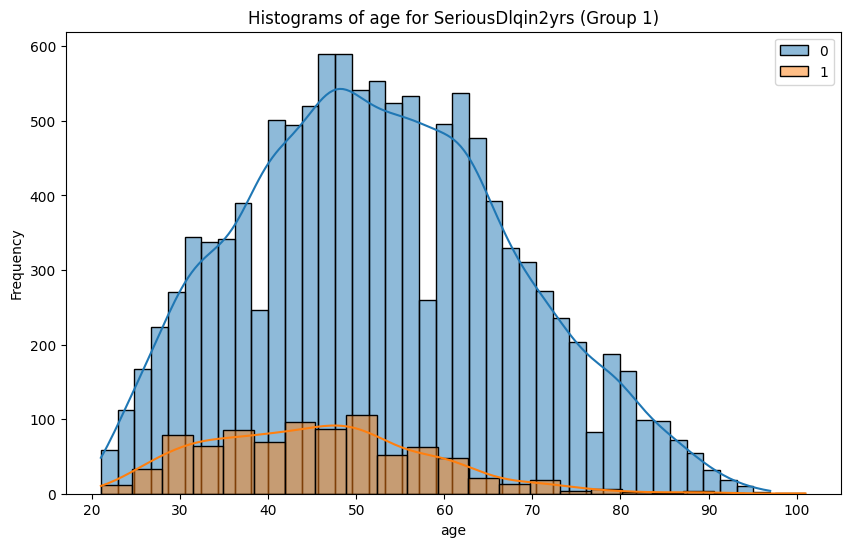

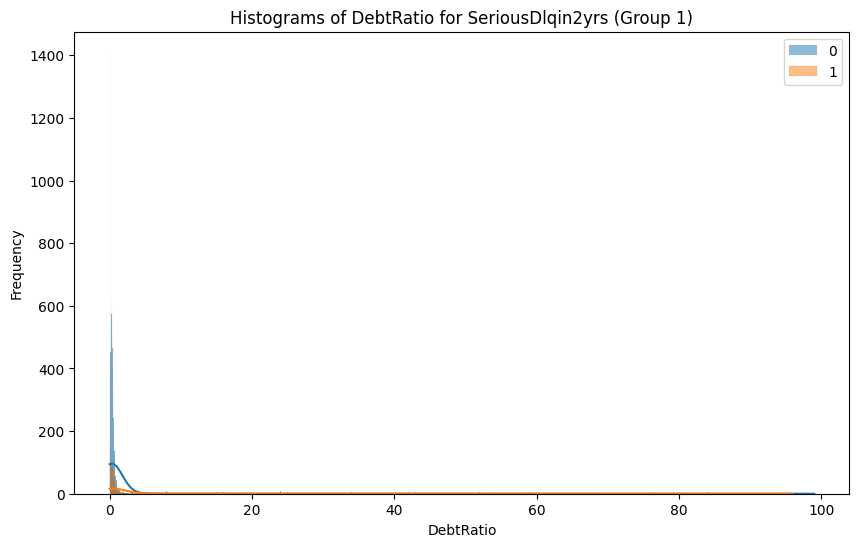

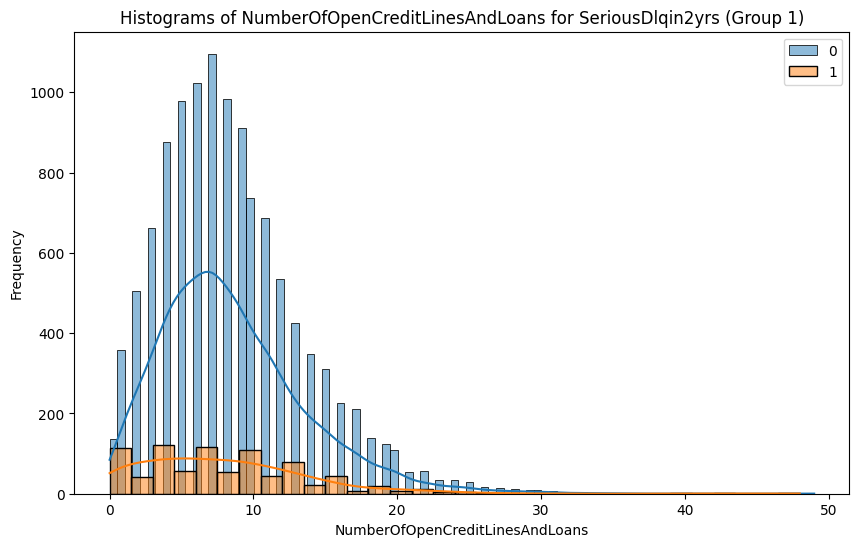

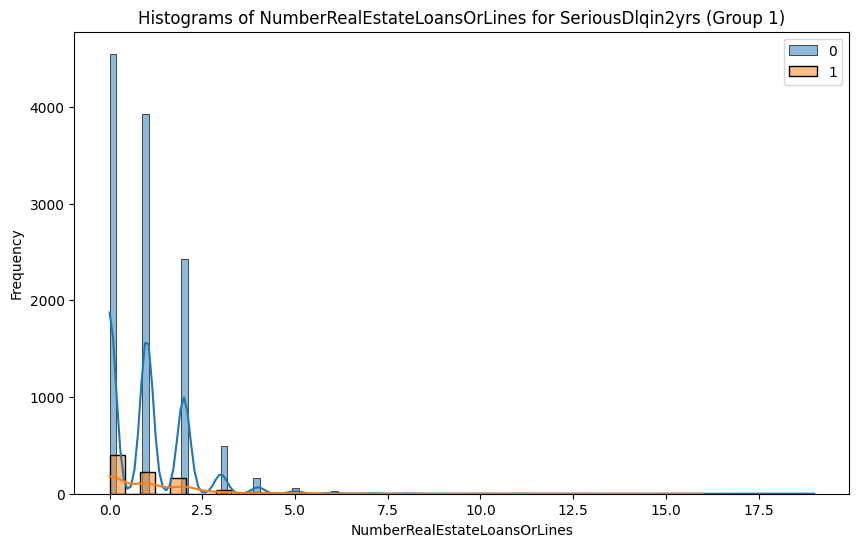

In [21]:
for numerical in features_num_sin_target:
    bt.plot_grouped_histograms(df_credit,cat_col = target, num_col= numerical, group_size= 2)

- No se aprecia una colinealidad entre las variables que sea para tener en cuenta, aunque si es que verdad que las variables NumberOF...si que tiene relacion entre ellas, pero no vamos a tocar nada de momento.    
- No se va a descartar ninguna variable.

- ### 2.1 Features Finales

In [22]:
features_2_1_Basic = features_num_sin_target + ["NumberOfTimes90DaysLate"]
features_2_1_Basic

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfTimes90DaysLate']

>### 2.2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 

>### 2.2.a - SelectKBest (ANOVA)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
X_train = df_credit[features_num_sin_target]
y_train = df_credit[target]
selector = SelectKBest(f_classif, k=3)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
features_num_SelectKBest_ANOVA = list(selector.get_feature_names_out())
print(features_num_SelectKBest_ANOVA)
X_train_kbest


['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans']


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfOpenCreditLinesAndLoans
0,0.081892,37.0,12.0
1,0.023413,74.0,9.0
2,0.000000,43.0,2.0
3,0.492754,44.0,4.0
4,1.000000,63.0,3.0
...,...,...,...
12532,0.197116,59.0,6.0
12533,0.036726,62.0,12.0
12534,0.120313,49.0,7.0
12535,0.252566,63.0,9.0


>### 2.2.b -  Mutual Information

In [24]:
from sklearn.metrics import mutual_info_score

In [25]:
features_cat_MutualInformation = []
for col in features_cat:
    features_cat_MutualInformation.append(col)
    print(f"MI({col};{target}):", mutual_info_score(df_credit[col],df_credit[target]))
    print("")
features_cat_MutualInformation


MI(NumberOfTime30-59DaysPastDueNotWorse;SeriousDlqin2yrs): 0.01952542985573684

MI(NumberOfTimes90DaysLate;SeriousDlqin2yrs): 0.03237707074217218

MI(NumberOfTime60-89DaysPastDueNotWorse;SeriousDlqin2yrs): 0.018335148933738804



['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

- Los valores no son 0, por lo que hay dependencia entre ellas.    
- Mas en el caso de 90 Days Late (nos quedamos esta).

- ### 2.2  Features finales

In [26]:
features_2_2_ANOVA_MI = features_num_SelectKBest_ANOVA + ['NumberOfTimes90DaysLate']
features_2_2_ANOVA_MI


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate']

>### 2.3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

lr_selector = LogisticRegression(max_iter = 1000)
rf_selector = RandomForestClassifier(random_state= 42)

In [28]:
rf_selector.fit(df_credit[features_num_sin_target],df_credit[target])

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.feature_selection import SelectFromModel

In [30]:
selector_model = SelectFromModel(estimator = rf_selector, threshold= "median")

In [31]:
selector_model.fit(df_credit[features_num_sin_target+features_cat],df_credit[target])

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

- ### 2.3 Features Finales

In [32]:
features_2_3_SelectFromModel = list(selector_model.get_feature_names_out())
features_2_3_SelectFromModel

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans']

>### 2.4. Selección de las mejores features empleando RFE.

In [33]:
from sklearn.feature_selection import RFE

In [34]:
rf_RFE = RandomForestClassifier(random_state= 42)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, 
          step = 1) 

rfe.fit(df_credit[features_num_sin_target+features_cat], df_credit[target])
print(rfe.ranking_)
RFE_ranking = pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = features_num_sin_target+features_cat).sort_values("ranking")
RFE_ranking

[1 1 1 1 2 4 1 3]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
age,1
DebtRatio,1
NumberOfOpenCreditLinesAndLoans,1
NumberOfTimes90DaysLate,1
NumberRealEstateLoansOrLines,2
NumberOfTime60-89DaysPastDueNotWorse,3
NumberOfTime30-59DaysPastDueNotWorse,4


- ### 2.4 Features Finales

In [35]:
features_RFE_filtradas = RFE_ranking.loc[RFE_ranking.ranking == 1]
features_2_4_RFE = list(features_RFE_filtradas.index)
features_2_4_RFE

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate']

>### 2.5. Selección de las mejores features empleando SFS.

In [36]:
from sklearn.feature_selection import SequentialFeatureSelector

In [37]:
rf_SFS = RandomForestClassifier(random_state = 42)

sfs_forward = SequentialFeatureSelector(rf_SFS,
                                        n_features_to_select = 5,
                                        cv = 4,
                                        scoring = "balanced_accuracy")


sfs_forward.fit(df_credit[features_num_sin_target+features_cat], df_credit[target])
features_2_5_SFS = list(sfs_forward.get_feature_names_out())


- ### 2.5 Features Finales

In [38]:
features_2_5_SFS

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

### 2.6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

In [39]:
dicc_votos ={}
for feature in df_credit.columns:
     total = features_2_1_Basic + features_2_2_ANOVA_MI + features_2_3_SelectFromModel + features_2_4_RFE + features_2_5_SFS
     if feature in total:
        dicc_votos[feature] = total.count(feature)
    
df_features_finalistas = pd.DataFrame(data=list(dicc_votos.values()), index=list(dicc_votos.keys()), columns = ["Votos"]).sort_values(by="Votos", ascending=False)
df_features_finalistas

,Votos
RevolvingUtilizationOfUnsecuredLines,5
age,5
NumberOfOpenCreditLinesAndLoans,5
NumberOfTimes90DaysLate,4
DebtRatio,3
NumberRealEstateLoansOrLines,1
NumberOfTime60-89DaysPastDueNotWorse,1


- ### 2.6 Features Finales

In [40]:
filtro_features_finalistas = df_features_finalistas.loc[df_features_finalistas.Votos == df_features_finalistas.Votos.mode()[0]]
features_2_6_hard_voting = list(filtro_features_finalistas.index)
features_2_6_hard_voting

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfOpenCreditLinesAndLoans']

>## 3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [42]:
X = df_credit.drop(target, axis=1)
y = df_credit[target]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
lr = LogisticRegression(max_iter = 1000)
rf = RandomForestClassifier(max_depth=5, n_estimators=150)
knn = KNeighborsClassifier()

In [45]:
modelos_ML = [lr, rf, knn]
listas = [features_2_1_Basic, features_2_2_ANOVA_MI, features_2_3_SelectFromModel, features_2_4_RFE, features_2_5_SFS, features_2_6_hard_voting]
nombres_listas = ["2_1_Basic", "2_2_ANOVA_MI", "2_3_SelectFromModel", "2_4_RFE", "2_5_SFS", "2_6_Hard_Voting"]

nombre_modelos = ["Logistic Regression", "Random Forest", "KNN"]

dicc_scores = {nombre: [] for nombre in nombre_modelos}

for pos, modelo in enumerate(modelos_ML):
    print(f"{modelo}") 


    for i, lista in enumerate(listas):
        nombre_metodo = nombres_listas[i]
        cv_score = cross_val_score(modelo, X_train[lista], y_train, scoring="balanced_accuracy")
        
        dicc_scores[nombre_modelos[pos]].append(cv_score.mean())

        print(f"{cv_score.mean()}")
        print("")

df_resultados_finales = pd.DataFrame(data=dicc_scores, index=nombres_listas)

df_resultados_finales
    

LogisticRegression(max_iter=1000)
0.5775791516274676

0.5716990570877614

0.5061093813115496

0.5718062382238813

0.5688655838749096

0.5060557907434895

RandomForestClassifier(max_depth=5, n_estimators=150)
0.5285401241806615

0.5616061179757945

0.5011606185882713

0.542935286689167

0.5476345854207505

0.500709219858156

KNeighborsClassifier()
0.5190194393795199

0.5172945963534588

0.5137943666795957

0.5180038449465038

0.529363570768848

0.5129727274198557



,Logistic Regression,Random Forest,KNN
2_1_Basic,0.577579,0.528540,0.519019
2_2_ANOVA_MI,0.571699,0.561606,0.517295
2_3_SelectFromModel,0.506109,0.501161,0.513794
2_4_RFE,0.571806,0.542935,0.518004
2_5_SFS,0.568866,0.547635,0.529364
2_6_Hard_Voting,0.506056,0.500709,0.512973


- El mejor es Logistic regression con las features obtenidas con la seleccion manual (visualizacion)

In [46]:
print(f"GANADOR: {features_2_1_Basic}")
print("")
print(features_2_2_ANOVA_MI)
print(features_2_3_SelectFromModel)
print(features_2_4_RFE)
print(features_2_5_SFS)
print(features_2_6_hard_voting)

GANADOR: ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate']

['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse']
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfOpenCreditLinesAndLoans']


>## 4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
lr_ganador = LogisticRegression()
lr_ganador.fit(X_train[features_2_1_Basic], y_train)

LogisticRegression()

In [52]:
#import warnings library
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [53]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularización
    'C': [0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Algoritmos de optimización
    'max_iter': [100, 200, 500],  # Número máximo de iteraciones
    'class_weight': [None, 'balanced']  # Peso de las clases
}


lr_ganador_gs = GridSearchCV(lr_ganador, param_grid=param_grid, cv=5, scoring="balanced_accuracy")

lr_ganador_gs.fit(X_train, y_train)

print("Mejores parámetros:", lr_ganador_gs.best_params_)
print("Mejor score:", lr_ganador_gs.best_score_)

Mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Mejor score: 0.7734894275390861


In [54]:
from sklearn.metrics import classification_report, accuracy_score

In [55]:
y_pred = lr_ganador_gs.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8026315789473685
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      2345
           1       0.21      0.72      0.32       163

    accuracy                           0.80      2508
   macro avg       0.59      0.77      0.60      2508
weighted avg       0.93      0.80      0.85      2508



### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.